# Class Ball Vision
***********************************************************
* __File__: BallVision.py
* __project__: ROBOFEI-HT - FEI 😛
* __author__: Claudio Vilão
* __version__: V0.1.0
* __created__: 01/10/2015
* __e-mail__: tyu@uol.com.br
* __brief__: Vision
* __modified by__: Vinicius N. Ferreira
* __modified__: 23/09/2016
***********************************************************
Responsible for recognizing the ball LARC and RoboCup.
***********************************************************

In [1]:
#ini-iPython

# Bibliotecas usadas
Base de bibliotecas usadas pelo algoritmo:

|Nome biblioteca|Descrição|
|:-:|:-:|
|cv2|OpenCV - Biblioteca usada para operações com a câmera e imagem.|
|os|Usando para enviar comandos para o sistema.|
|numpy as np|Operação de matrizes.|
|time|Usado para medição de tempo.|
|ConfigParser|Usado para leitura do config.|

In [2]:
#end-iPython

In [3]:
import cv2
import os
import argparse
import numpy as np
import time
import datetime
try:
    from ConfigParser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0
#ini-iPython
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
#end-iPython

In [4]:
#ini-iPython
def plt_show(img, titulo = "", cmap = ''):
    if cmap == 'gray':
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title(titulo)
    plt.show()

class args:
    visionball = 0
#end-iPython

In [5]:
class BallVision(object):
    #ini-iPython
    pass
    #end-iPython

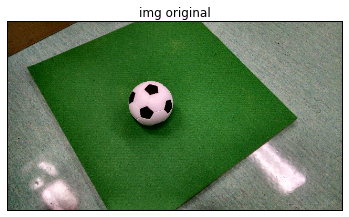

In [55]:
#ini-iPython
img = cv2.imread('bolaMeio.jpg')

# Exibindo img
img = cv2.resize(img, (0,0), fx=640.0/img.shape[1], fy=640.0/img.shape[1])
plt_show(img, u"img original")
#end-iPython

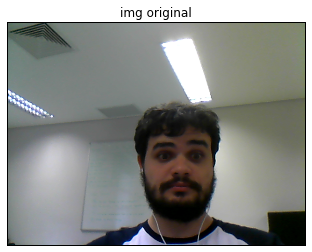

In [53]:
#ini-iPython
cap = cv2.VideoCapture(0)

while(True):
    # Capture img-by-img
    ret, img = cap.read()

    # Our operations on the img come here

    # Display the resulting img
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Exibindo img
img = cv2.resize(img, (0,0), fx=640.0/img.shape[1], fy=640.0/img.shape[1])
plt_show(img, u"img original")
#end-iPython

In [56]:
#-----------------------------------------------------------------------------------------------------------------
# Segmentation Algorithm


# Dictionary for white segmentation

In [52]:
__seg_white = {
    'H_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do hue mínimo usado para a segmentação do branco" # Review config.ini
             ],
    'S_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do saturation mínimo usado para a segmentação do branco" # Review config.ini
             ],
    'V_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do value mínimo usado para a segmentação do branco" # Review config.ini
             ],
    'H_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do hue máximo usado para a segmentação do branco" # Review config.ini
             ],
    'S_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do saturation máximo usado para a segmentação do branco" # Review config.ini
             ],
    'V_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do value máximo usado para a segmentação do branco" # Review config.ini
             ],
    'size_element': [2, # Used value
                     'int', # Tipo do dado
                     1, # Minimum allowed value
                     255, # Maximum allowed value
                     "Tamaho do elemento estruturante usado na erosão e na dilatação" # Review config.ini
                    ],
    'iterations': [2, # Used value
                   'int', # Tipo do dado
                   1, # Minimum allowed value
                   50, # Maximum allowed value
                   "Número de interações que serão aplicadas na erosão e na dilatação" # Review config.ini
                  ],
    'blur': [0, # Used value
             'int', # Tipo do dado
             0, # Minimum allowed value
             10, # Maximum allowed value
             "Tamaho do elemento estruturante usado no medianBlur" # Review config.ini
            ],
    'comment': 'Valores usados para a segmentação do branco',
    'section': 'Seg. Branco'
}

# Dictionary for green segmentation

In [7]:
__seg_green = {
    'H_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do hue mínimo usado para a segmentação do verde" # Review config.ini
             ],
    'S_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do saturation mínimo usado para a segmentação do verde" # Review config.ini
             ],
    'V_min': [0, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do value mínimo usado para a segmentação do verde" # Review config.ini
             ],
    'H_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do hue máximo usado para a segmentação do verde" # Review config.ini
             ],
    'S_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do saturation máximo usado para a segmentação do verde" # Review config.ini
             ],
    'V_max': [255, # Used value
              'int', # Tipo do dado
              0, # Minimum allowed value
              255, # Maximum allowed value
              "Valor do value máximo usado para a segmentação do verde" # Review config.ini
             ],
    'size_element': [2, # Used value
                     'int', # Tipo do dado
                     1, # Minimum allowed value
                     255, # Maximum allowed value
                     "Tamaho do elemento estruturante usado na erosão e na dilatação" # Review config.ini
                    ],
    'iterations': [2, # Used value
                   'int', # Tipo do dado
                   1, # Minimum allowed value
                   50, # Maximum allowed value
                   "Número de interações que serão aplicadas na erosão e na dilatação" # Review config.ini
                  ],
    'blur': [0, # Used value
             'int', # Tipo do dado
             0, # Minimum allowed value
             10, # Maximum allowed value
             "Tamaho do elemento estruturante usado no medianBlur" # Review config.ini
            ],
    'comment': 'Valores usados para a segmentação do verde',
    'section': 'Seg. Verde'
}

# Dictionary for internal reconstruction of the mask

In [8]:
__internal_reconstruction = {
    'size_element': [2, # Used value
                     'int', # Tipo do dado
                     1, # Minimum allowed value
                     255, # Maximum allowed value
                     "Tamaho do elemento estruturante usado na erosão e na dilatação" # Review config.ini
                    ],
    'iterations': [2, # Used value
                   'int', # Tipo do dado
                   1, # Minimum allowed value
                   50, # Maximum allowed value
                   "Número de interações que serão aplicadas na erosão e na dilatação" # Review config.ini
                  ],
    'comment': 'Valores usados para reconstruir uma máscara',
    'section': 'Reconstrução interna'
}

# Dictionary for mask expansion

In [9]:
__mask_dilate = {
    'size_element': [2, # Used value
                     'int', # Tipo do dado
                     1, # Minimum allowed value
                     255, # Maximum allowed value
                     "Tamaho do elemento estruturante usado na erosão e na dilatação" # Review config.ini
                    ],
    'iterations': [2, # Used value
                   'int', # Tipo do dado
                   1, # Minimum allowed value
                   50, # Maximum allowed value
                   "Número de interações que serão aplicadas na erosão e na dilatação" # Review config.ini
                  ],
    'diff': [1, # Used value
             'int', # Tipo do dado
             1, # Minimum allowed value
             50, # Maximum allowed value
             "Diferença entre a erosão e a dilatação" # Review config.ini
            ],
    'blur': [0, # Used value
             'int', # Tipo do dado
             0, # Minimum allowed value
             10, # Maximum allowed value
             "Tamaho do elemento estruturante usado no medianBlur (Valor obrigatoriamente ímpar ou zero)" # Review config.ini
            ],
    'comment': 'Valores usados para dilatação da máscara',
    'section': 'Dilatação Máscara'
}

# Dictionary for parameters Circle Hough

In [10]:
__paramcirhough = {
    'dp': [1, # Used value
           'float', # Tipo do dado
           1, # Minimum allowed value
           255, # Maximum allowed value
           "Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height." # Review config.ini
          ],
    'minDist': [20, # Used value
                'int', # Tipo do dado
                1, # Minimum allowed value
                50, # Maximum allowed value
                "Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed." # Review config.ini
               ],
    'param1': [50, # Used value
               'int', # Tipo do dado
               1, # Minimum allowed value
               50, # Maximum allowed value
               "First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller)." # Review config.ini
              ],
    'param2': [30, # Used value
               'int', # Tipo do dado
               1, # Minimum allowed value
               50, # Maximum allowed value
               "Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first." # Review config.ini
              ],
    'minRadius': [0, # Used value
                  'int', # Tipo do dado
                  1, # Minimum allowed value
                  50, # Maximum allowed value
                  "Minimum circle radius." # Review config.ini
                 ],
    'maxRadius': [0, # Used value
                  'int', # Tipo do dado
                  1, # Minimum allowed value
                  50, # Maximum allowed value
                  "Maximum circle radius." # Review config.ini
                 ],
    'blur': [5, # Used value
             'int', # Tipo do dado
             0, # Minimum allowed value
             10, # Maximum allowed value
             "Tamanho do elemento estruturante usado no medianBlur (Valor obrigatoriamente ímpar ou zero)" # Review config.ini
            ],
    'comment': 'Valores usados para o Circulo de Hough',
    'section': 'Circulo de Hough'
}

# Color segmentation function
Using the color dictionary to generate a mask

In [14]:
#edes-iPython def segColor(self, img, seg):
def segColor(img, seg):
    media = cv2.medianBlur(img, seg['blur'][0]) # Média blur tentar homogeneizar as cores
    hsv = cv2.cvtColor(media, cv2.COLOR_BGR2HSV) # Convertendo de RGB para HSV
    
    ## Segmentando a cor
    mask_campo = cv2.inRange(hsv, # imagem a ser aplicada
                     np.array([seg['H_min'][0], seg['S_min'][0], seg['V_min'][0]]), # Valores mínimos do HSV
                     np.array([seg['H_max'][0], seg['S_max'][0], seg['V_max'][0]]), # Valores máximos do HSV
                    )

    ## erosion
    mask_campo = cv2.erode(mask_campo, # Aonde sera aplicada
                   np.ones((seg['size_element'][0],seg['size_element'][0]),np.uint8), # Tamanho do ES
                   iterations = seg['iterations'][0] # Número de iterações
                  )

    ## dilation
    mask_campo = cv2.dilate(mask_campo, # Aonde sera aplicada
                    np.ones((seg['size_element'][0],seg['size_element'][0]),np.uint8), # Tamanho do ES
                    iterations = seg['iterations'][0] # Número de iterações
                   )
    return mask_campo

# Green segmentation function
Segments using dicionaio of green available in class

In [15]:
#edes-iPython def segGreen(self, img): # Segmentação verde
def segGreen(img): # Segmentação verde
    return segColor(img, __seg_green)

# White segmentation function
Segments using dicionaio of white available in class

In [16]:
#edes-iPython def segWhite(self, img): # Segmentação branco
def segWhite(img): # Segmentação branco
    return segColor(img, __seg_white)

In [17]:
#ini-iPython

## Aplicando segmentação do verde
Valores padrões usado para segmentar

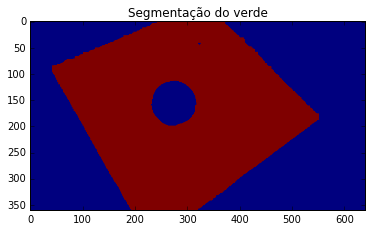

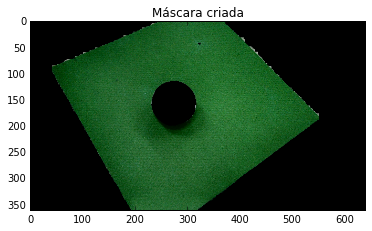

In [18]:
__seg_green['blur'][0] = 5 # Deve ser ímpar ou zero

__seg_green['H_min'][0] = 50
__seg_green['H_max'][0] = 72

__seg_green['S_min'][0] = 19
__seg_green['S_max'][0] = 255

__seg_green['V_min'][0] = 0
__seg_green['V_max'][0] = 195

__seg_green['size_element'][0] = 3
__seg_green['iterations'][0] = 5

mask_verde = segGreen(img)

# Exibindo mascara do campo
plt.imshow(mask_verde)
plt.title(u"Segmentação do verde")
plt.show()

# Exibindo na imagem
plt.imshow(cv2.bitwise_and(img,img,mask=mask_verde))
plt.title(u"Máscara criada")
plt.show()
#end-iPython

# Internal reconstruction.
@param mask_campo - Get the mask with some imperfections such as holes or internal chamfers.
@retun - Returns a mask without internal holes and chamfers.

In [19]:
#edes-iPython def internalReconstruction(self, mask_campo): # Retira os buracos internos da mascara
def internalReconstruction(mask_campo): # Retira os buracos internos da mascara
    _, contours, _ = cv2.findContours(mask_campo.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Determina o contorno
    mask = np.zeros(mask_campo.shape, np.uint8) # Cria uma mascara
    
    ## Contorno simples - Borda completa
    cv2.drawContours(mask, contours, -1, (255), -1) # gerando máscara
    
    ## erosion
    mask_campo = cv2.erode(mask_campo, # Aonde sera aplicada
                   np.ones((__internal_reconstruction['size_element'][0],__internal_reconstruction['size_element'][0]),np.uint8), # Tamanho do ES
                   iterations = __internal_reconstruction['iterations'][0] # Número de iterações
                  )

    ## dilation
    mask_campo = cv2.dilate(mask_campo, # Aonde sera aplicada
                   np.ones((__internal_reconstruction['size_element'][0],__internal_reconstruction['size_element'][0]),np.uint8), # Tamanho do ES
                   iterations = __internal_reconstruction['iterations'][0] # Número de iterações
                  )
    return mask

In [20]:
#ini-iPython

## Reconstruindo máscara
Preenchendo área interna da máscara

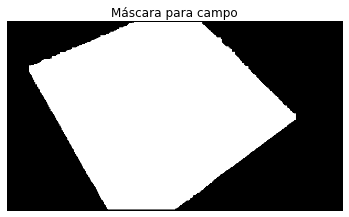

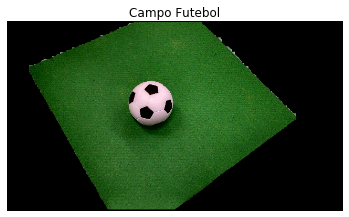

In [21]:
__internal_reconstruction['size_element'][0] = 5
__internal_reconstruction['iterations'][0] = 10

mask_campo = internalReconstruction(mask_verde)

plt_show(mask_campo, u"Máscara para campo", 'gray')

## Para o img
plt_show(cv2.bitwise_and(img,img,mask=mask_campo), "Campo Futebol")

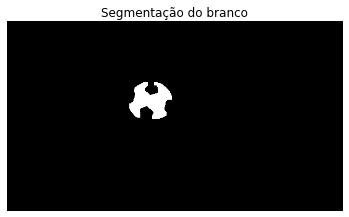

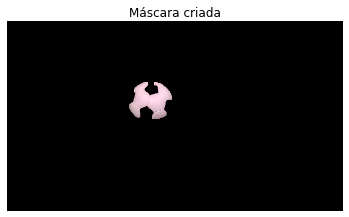

In [22]:
__seg_white['blur'][0] = 5 # Deve ser ímpar ou zero

__seg_white['H_min'][0] = 0
__seg_white['H_max'][0] = 255

__seg_white['S_min'][0] = 0
__seg_white['S_max'][0] = 255

__seg_white['V_min'][0] = 155
__seg_white['V_max'][0] = 255

__seg_white['size_element'][0] = 3
__seg_white['iterations'][0] = 3

mask_branco = segWhite(cv2.bitwise_and(img, img, mask = mask_campo))

# Exibindo mascara do campo
plt_show(mask_branco, u"Segmentação do branco", cmap='gray')

# Exibindo na imagem
plt_show(cv2.bitwise_and(img,img,mask=mask_branco), u"Máscara criada")
#end-iPython

# Mask dilate.
@param mask_branco - Receives the mask to be expanded.
@retun - Returns the dilated mask with predefined parameters.

In [23]:
#edes-iPython def maskDilate(self, mask_branco):
def maskDilate(mask_branco):
    ## dilation
    mask_bola = cv2.dilate(mask_branco, # Aonde sera aplicada
                   np.ones((__mask_dilate['size_element'][0],__mask_dilate['size_element'][0]),np.uint8), # Tamanho do ES
                   iterations = __mask_dilate['iterations'][0] # Número de iterações
                  )
    
    ## erosion
    mask_bola = cv2.erode(mask_bola, # Aonde sera aplicada
                  np.ones((__mask_dilate['size_element'][0],__mask_dilate['size_element'][0]),np.uint8), # Tamanho do ES
                  iterations = __mask_dilate['iterations'][0] - __mask_dilate['diff'][0] # Número de iterações
                 )

    mask_bola = cv2.blur(mask_bola, # Aonde sera aplicada
                 (__mask_dilate['blur'][0],__mask_dilate['blur'][0]) # Tamanho do ES
                )
    return mask_bola

In [24]:
#ini-iPython

## Teste de função de dilatação

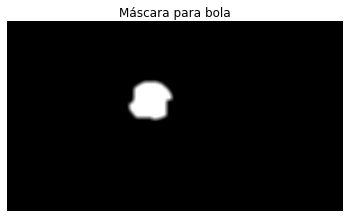

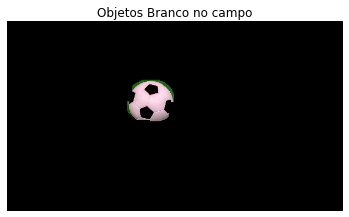

In [29]:
__mask_dilate['size_element'][0] = 3
__mask_dilate['iterations'][0] = 20

__mask_dilate['diff'][0] = 0
__mask_dilate['blur'][0] = 9

mask_bola = maskDilate(mask_branco)

plt_show(mask_bola, u"Máscara para bola", cmap='gray')

## Para o img
plt_show(cv2.bitwise_and(img,img,mask=mask_bola), "Objetos Branco no campo")
#end-iPython

# Detect Circles.
@param img - Receives image to detect the circumferences.
@retun - Returns vector with the centers and radii of all circles.

In [57]:
#edes-iPython def detectCircles(self, img):
def detectCircles(img):
    plt_show(img, cmap="gray", titulo="Para detectar Circulos")
    circles = cv2.HoughCircles(img, # Imagem a ser aplicada
                               cv2.HOUGH_GRADIENT, # Tecnica usada
                               __paramcirhough['dp'][0], # 
                               __paramcirhough['minDist'][0], # Distancia minima entre centros
                               param1 = __paramcirhough['param1'][0],
                               param2 = __paramcirhough['param2'][0],
                               minRadius = __paramcirhough['minRadius'][0], # Raio minimo
                               maxRadius = __paramcirhough['maxRadius'][0]) # Raio maximo
    return circles

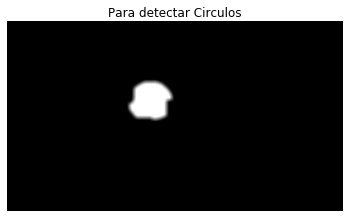

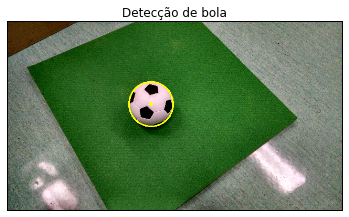

In [58]:
#ini-iPython
__paramcirhough['blur'][0] = 9

__paramcirhough['dp'][0] = 2.5
__paramcirhough['minDist'][0] = 100
__paramcirhough['param1'][0] = 200
__paramcirhough['param2'][0] = 70
__paramcirhough['minRadius'][0] = 0
__paramcirhough['maxRadius'][0] =  0


img1 = img.copy()

circles = detectCircles(mask_bola)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img1,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(img1,(i[0],i[1]),2,(255,0,0),3)
    cv2.circle(img1,(circles[0,0][0],circles[0,0][1]),circles[0,0][2],(0,255,255),2)
    # draw the center of the circle
    cv2.circle(img1,(circles[0,0][0],circles[0,0][1]),2,(0,255,255),3)

plt_show(img1, u"Detecção de bola")
#end-iPython

0:00:00.048474


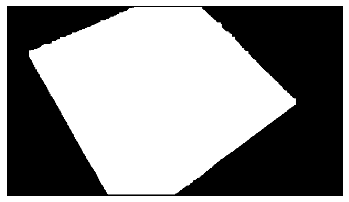

In [59]:
#edes-iPython def detectField(self, img):
def detectField(img):
    maskfield = segGreen(img)
    maskfield = internalReconstruction(maskfield)
    return maskfield
#ini-iPython
start = datetime.datetime.now()
maskfield = detectField(img)
stop = datetime.datetime.now()
print stop - start
plt_show(maskfield, cmap='gray')
#end-iPython

# Detect Ball.
@param img - Receives the img and detects the ball using segmentation and Hough.
@retun - Returns vector with the centers and radii of all circles.

In [61]:
#edes-iPython def detectBall(self, img):
def detectBall(img):
    maskball = segWhite(img)
    maskball = maskDilate(maskball)
    circles = detectCircles(maskball)
    if circles is not None:
        return circles[0]
    else:
        return None
#ini-iPython

#Testando função
    
img1 = img.copy()
circles = detectBall(maskfield)

if circles is not None:
    for (x,y,r) in circles:
        cv2.circle(img1,(x,y),r,(0,255,0),2)
        cv2.circle(img1,(x,y),2,(255,0,0),3)
    cv2.circle(img1,(circles[0][0],circles[0][1]),circles[0][2],(255,255,0),2)
    cv2.circle(img1,(circles[0][0],circles[0][1]),2,(255,255,0),3)
plt_show(img1)
#end-iPython

error: /home/vinicius/OpenCV3/opencv/modules/imgproc/src/smooth.cpp:3065: error: (-215) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function medianBlur


# Dictionary for Haar-cascade Detection

In [35]:
__paramhaar = {
    'minNeighbors': [5, # Used value
           'int', # Tipo do dado
           1, # Minimum allowed value
           255, # Maximum allowed value
           "Parameter specifying how many neighbors each candidate rectangle should have to retain it" # Review config.ini
          ],
    'scaleFactor': [1.1, # Used value
                'float', # Tipo do dado
                1, # Minimum allowed value
                50, # Maximum allowed value
                "Parameter specifying how much the image size is reduced at each image scale" # Review config.ini
               ],
    'minSize': [1, # Used value
               'int', # Tipo do dado
               1, # Minimum allowed value
               50, # Maximum allowed value
               "Minimum possible object size. Objects smaller than that are ignored" # Review config.ini
              ],
    'maxSize': [1000, # Used value
               'int', # Tipo do dado
               1, # Minimum allowed value
               50, # Maximum allowed value
               "Maximum possible object size. Objects larger than that are ignored" # Review config.ini
              ],
    'comment': 'Valores usados para o Haar',
    'section': 'Haar'
}

# Dictionary for basic variables to class

In [36]:
__standards = {
    'radiuscut': [5, # Used value
           'int', # Tipo do dado
           1, # Minimum allowed value
           255, # Maximum allowed value
           "Parameter specifying how many neighbors each candidate rectangle should have to retain it" # Review config.ini
          ],
#ini-iPython
#     'scaleFactor': [1.1, # Used value
#                 'float', # Tipo do dado
#                 1, # Minimum allowed value
#                 50, # Maximum allowed value
#                 "Parameter specifying how much the image size is reduced at each image scale" # Review config.ini
#                ],
#     'minSize': [1, # Used value
#                'int', # Tipo do dado
#                1, # Minimum allowed value
#                50, # Maximum allowed value
#                "Minimum possible object size. Objects smaller than that are ignored" # Review config.ini
#               ],
#     'maxSize': [1000, # Used value
#                'int', # Tipo do dado
#                1, # Minimum allowed value
#                50, # Maximum allowed value
#                "Maximum possible object size. Objects larger than that are ignored" # Review config.ini
#               ],
#end-iPython
    'comment': 'Variáveis básicas para classe',
    'section': 'Standards'
}

# Auxiliary variable to run
Initial condition of execution

In [37]:
__status = [0, 0, 0, 0]
ballhaar = None
#ini-iPython
if os.path.isfile('Ball.xml'):
    ballhaar = cv2.CascadeClassifier('Ball.xml')
else:
    raise Exception(0) # Code to error read Ball.xml
#end-iPython

Exception: 0

# Confirm Ball.
@param img - Receives the img and detects the ball using Haar.
@param position - Receives the img and detects the ball using Haar.
@retun - Returns vector with the centers and radii of all circles.

In [ ]:
#edes-iPython def confirmBall(self, img, position):
def confirmBall(img, position):
    for (x,y,rad) in position:
        plt_show(img[y-rad-__standards['radiuscut'][0]:y+rad+__standards['radiuscut'][0],x-rad-__standards['radiuscut'][0]:x+rad+__standards['radiuscut'][0]])
        ball = ballhaar.detectMultiScale(img[y-rad-__standards['radiuscut'][0]:y+rad+__standards['radiuscut'][0],x-rad-__standards['radiuscut'][0]:x+rad+__standards['radiuscut'][0]],
                                      minNeighbors=__paramhaar['minNeighbors'][0],
                                      scaleFactor=__paramhaar['scaleFactor'][0],
                                      minSize=(__paramhaar['minSize'][0], __paramhaar['minSize'][0]),
                                      maxSize=(__paramhaar['maxSize'][0], __paramhaar['maxSize'][0]))
        #ini-iPython
        for (a,b,w,h) in ball:
            cv2.rectangle(img,
                (int(x-rad-__standards['radiuscut'][0]+a),int(y-rad-__standards['radiuscut'][0]+b)),
                (int(x-rad-__standards['radiuscut'][0]+a+w),int(y-rad-__standards['radiuscut'][0]+b+h)),
                (255,0,0),
                2)
        #end-iPython
        plt_show(img)
        if len(ball) != 0:
            return [x, y, rad]
    return 0
#ini-iPython
img1 = img.copy()
print confirmBall(img1, circles)
#end-iPython

# Detect.
@param condition - Receives the img and detects the ball using Haar.
@param img - Receives the img and detects the ball using Haar.
@retun - Returns the status of detection of the ball.

In [ ]:
#edes-iPython def detect(self, condition, img):
def detect(condition, img):
    if condition == 0: # initial condition - detecting field and ball
        pass
#ini-iPython
img1 = img.copy()
detect(0, img1)
#end-iPython

In [ ]:
# cv2.setMouseCallback('Main Calibration', self.Segment, param='MAIN')
# def Segment(self, event, x, y, flags, param):
#         # Refreshs mouse's pointer position.
#         if event == cv2.EVENT_MOUSEMOVE:
#             self.pos = (int(x / self.scl), int(y / self.scl))

#         # Executed when a click happens
#         if event == cv2.EVENT_LBUTTONDOWN:
#             # Gets x and y from scaled image.
#             x = int(x / self.scl)
#             y = int(y / self.scl)

#             # Vector with the weights.
#             P = np.array([])
#             # Vector with the weighed sum of the HSV values of the point.
#             hM = np.array([])
#             sM = np.array([])
#             vM = np.array([])

#             # Iterates through all points around the click to compute their weighs.
#             for i in range(self.rad):
#                 for j in range(self.rad):
#                     try:
#                         # Relative x and y positions.
#                         ai = x + i - int(self.rad/2)
#                         aj = y + j - int(self.rad/2)
#                         # Computes the weight.
#                         aP = exp(-(pow(x-ai,2)+pow(y-aj,2))/18)
#                         # Gets the HSV values from the point.
#                         aC = self.hsv[aj][ai]
#                         # Saves everything on the vectors.
#                         P = np.append(P, aP)
#                         hM = np.append(hM, aC[0] * aP)
#                         sM = np.append(sM, aC[1] * aP)
#                         vM = np.append(vM, aC[2] * aP)
#                     except:
#                         pass

#             # Computes the normalizing factor.
#             N = np.sum(P)
#             # Computes the weighed sum of all HSV values.
#             mH = np.sum(hM)
#             mS = np.sum(sM)
#             mV = np.sum(vM)

#             # Refreshs the values for the Main Challenge Segmentation.
#             if param == 'MAIN':
#                 self.main_upper[0] = int(max(min(mH/N + self.thrs, 255), self.main_upper[0]))
#                 self.main_lower[0] = int(min(max(mH/N - self.thrs, 0), self.main_lower[0]))
#                 self.main_upper[1] = int(max(min(mS/N + self.thrs, 255), self.main_upper[1]))
#                 self.main_lower[1] = int(min(max(mS/N - self.thrs, 0), self.main_lower[1]))
#                 self.main_upper[2] = int(max(min(mV/N + self.thrs, 255), self.main_upper[2]))
#                 self.main_lower[2] = int(min(max(mV/N - self.thrs, 0), self.main_lower[2]))

#             # Refreshs the values for the Step Challenge Segmentation.
#             if param == 'STEP':
#                 self.step_upper[0] = int(max(min(mH/N + self.thrs, 255), self.step_upper[0]))
#                 self.step_lower[0] = int(min(max(mH/N - self.thrs, 0), self.step_lower[0]))
#                 self.step_upper[1] = int(max(min(mS/N + self.thrs, 255), self.step_upper[1]))
#                 self.step_lower[1] = int(min(max(mS/N - self.thrs, 0), self.step_lower[1]))
#                 self.step_upper[2] = int(max(min(mV/N + self.thrs, 255), self.step_upper[2]))
#                 self.step_lower[2] = int(min(max(mV/N - self.thrs, 0), self.step_lower[2]))

#             # Refreshs the values for the Swerve Challenge Segmentation.
#             if param == 'SWERVE':
#                 self.swerve_upper[0] = int(max(min(mH/N + self.thrs, 255), self.swerve_upper[0]))
#                 self.swerve_lower[0] = int(min(max(mH/N - self.thrs, 0), self.swerve_lower[0]))
#                 self.swerve_upper[1] = int(max(min(mS/N + self.thrs, 255), self.swerve_upper[1]))
#                 self.swerve_lower[1] = int(min(max(mS/N - self.thrs, 0), self.swerve_lower[1]))
#                 self.swerve_upper[2] = int(max(min(mV/N + self.thrs, 255), self.swerve_upper[2]))
#                 self.swerve_lower[2] = int(min(max(mV/N - self.thrs, 0), self.swerve_lower[2]))